In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('seaborn-v0_8-whitegrid')

### Question 1:

The rule 68-95-99.7 is in normal distribution:

68% of the population is within 1 std from the average

95% of the population is within 2 std from the average

99.7% of the population is within 3 std from the average


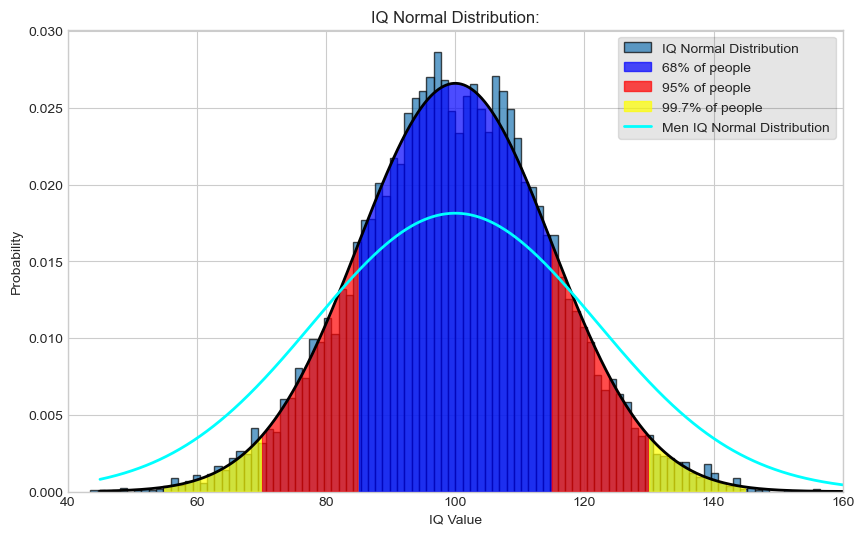

In [145]:
mu = 100 # average
sigma = 15 # std

plt.figure(figsize=(10,6))
plt.xlim([40,160])

random_numbers = np.random.normal(loc=100, scale=15, size=10000)
plt.hist(random_numbers, bins=100, label="IQ Normal Distribution", alpha=0.7, density=True, edgecolor='black')

x = np.linspace(start=45, stop=175, num=1000)
p = norm.pdf(x, 100, 15)

plt.plot(x, p, 'black', linewidth=2)

plt.fill_between(x,p,where=((x>=mu - sigma) & (x<= mu + sigma)), color='blue', label="68% of people", alpha=0.7)
plt.fill_between(x,p,where=(((x<mu-sigma) & (x>=mu-2*sigma)) | ((x<=mu+2*sigma) & (x>mu+sigma))), color='red', label="95% of people", alpha=0.7)
plt.fill_between(x,p,where=(((x>mu+2*sigma)&(x<= mu+3*sigma)) | ((x>= mu-3*sigma) &(x<mu-2*sigma))), color='yellow', label="99.7% of people", alpha=0.7)

y_men = np.random.normal(loc=100, scale=22, size=1000)
x_men = np.linspace(start=45, stop=175, num=1000)
p_men = norm.pdf(x_men, 100, 22)
plt.plot(x_men, p_men,'cyan', label="Men IQ Normal Distribution", linewidth=2)

plt.title("IQ Normal Distribution:")
plt.xlabel("IQ Value")
plt.ylabel("Probability")
plt.legend(facecolor='black',frameon= True, edgecolor= 'black', framealpha=0.1)
plt.show()

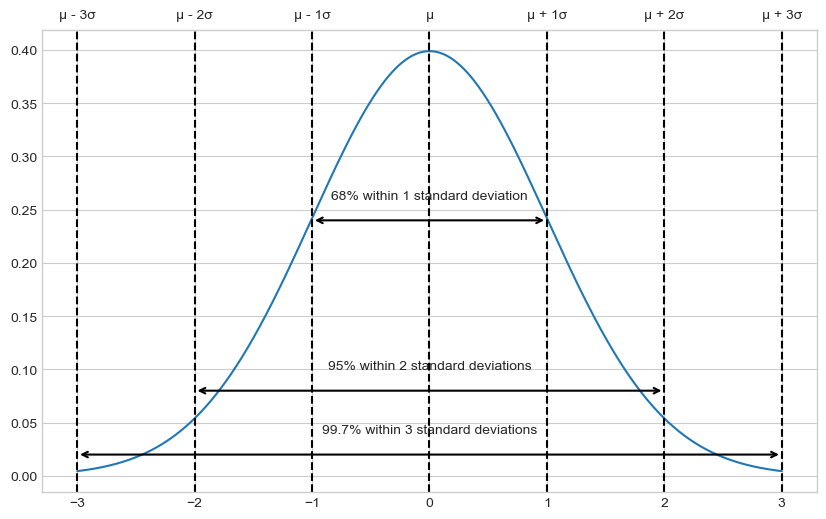

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for x values
x = np.linspace(-3, 3, 1000)
plt.figure(figsize=(10,6))
# Calculate y values using the probability density function for a normal distribution
y = norm.pdf(x)

# Plotting the curve
plt.plot(x, y)

# Adding lines for standard deviations from the mean
for i in range(-3, 4):
    plt.axvline(x=i, color='black', linestyle='--')

# Annotating percentages for each section between lines with horizontal arrows
plt.annotate('', xy=(-1, 0.24), xytext=(1, 0.24), arrowprops=dict(arrowstyle='<->', lw=1.5))
plt.annotate('68% within 1 standard deviation', xy=(0, 0.26), ha='center')

plt.annotate('', xy=(-2, 0.08), xytext=(2, 0.08), arrowprops=dict(arrowstyle='<->', lw=1.5))
plt.annotate('95% within 2 standard deviations', xy=(0, 0.10), ha='center')

plt.annotate('', xy=(-3, 0.02), xytext=(3, 0.02), arrowprops=dict(arrowstyle='<->', lw=1.5))
plt.annotate('99.7% within 3 standard deviations', xy=(0, 0.04), ha='center')

# Setting labels for mean and standard deviations on x-axis
for i in range(-3, 4):
    if i < 0:
        plt.text(i, 0.43, f'μ - {abs(i)}σ', ha='center')
    elif i > 0:
        plt.text(i, 0.43, f'μ + {i}σ', ha='center')
    else:
        plt.text(i, 0.43, 'μ', ha='center')

# Show grid and plot
plt.grid(True)
plt.show()


### Question 2:

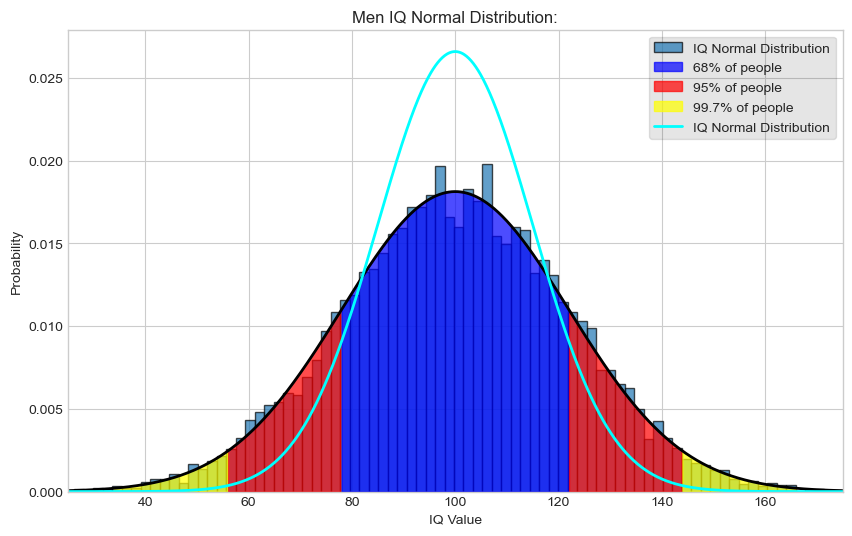

In [146]:
mu = 100
sigma = 22

plt.figure(figsize=(10,6))
plt.xlim([25,175])

random_numbers = np.random.normal(loc=100, scale=22, size=10000)
plt.hist(random_numbers, bins=100, label="IQ Normal Distribution", alpha=0.7, density=True, edgecolor='black')

y_men = np.random.normal(loc=100, scale=22, size=1000)
x_men = np.linspace(start=25, stop=175, num=1000)
p_men = norm.pdf(x_men, 100, 22)

plt.plot(x_men, p_men,'black', linewidth=2)
plt.fill_between(x_men,p_men,where=((x_men>=mu - sigma) & (x_men<= mu + sigma)), color='blue', label="68% of people", alpha=0.7)
plt.fill_between(x_men,p_men,where=(((x_men<mu-sigma) & (x_men>=mu-2*sigma)) | ((x_men<=mu+2*sigma) & (x_men>mu+sigma))), color='red', label="95% of people", alpha=0.7)
plt.fill_between(x_men,p_men,where=(((x_men>mu+2*sigma)&(x_men<= mu+3*sigma)) | ((x_men>= mu-3*sigma) &(x_men<mu-2*sigma))), color='yellow', label="99.7% of people", alpha=0.7)

x = np.linspace(start=25, stop=175, num=1000)
p = norm.pdf(x, 100, 15)
plt.plot(x, p, 'cyan', linewidth=2, label="IQ Normal Distribution")

plt.title("Men IQ Normal Distribution:")
plt.xlabel("IQ Value")
plt.ylabel("Probability")
plt.legend(facecolor='black',frameon= True, edgecolor= 'black', framealpha=0.1)
plt.show()

### Question 3:

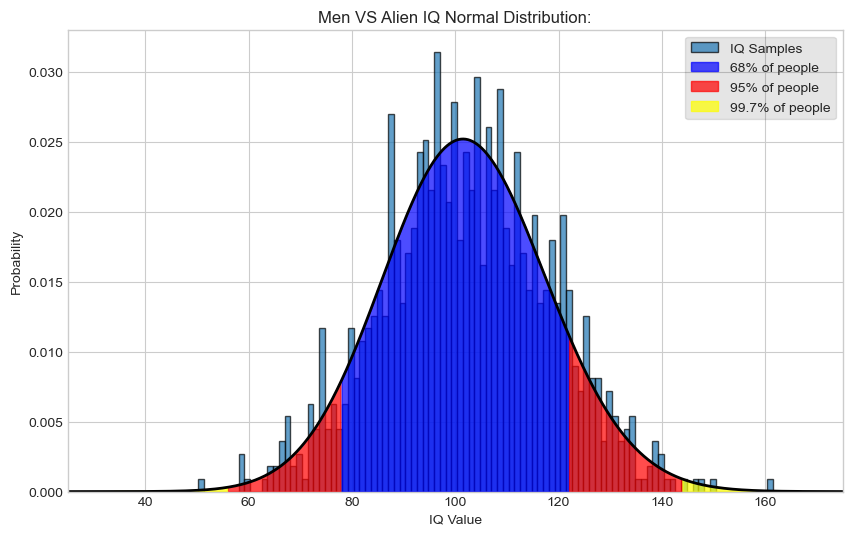

In [148]:
mu_human = 100
sigma_human = 15
human_population = 300_000_000

mu_alien = 115
sigma_alien = 15
alien_population = 50_000_000

plt.figure(figsize=(10,6))
plt.xlim([25,175])

x_ha = np.linspace(start=25, stop=175, num=1000)

human_p = norm.pdf(x_ha, mu_human, sigma_human)
alien_p = norm.pdf(x_ha, mu_alien, sigma_alien)

human_weight = human_population / (human_population + alien_population)
alien_weight = alien_population / (human_population + alien_population)

mean_combined = human_weight * mu_human + alien_weight * mu_alien
variance_combined = (human_weight * (sigma_human ** 2 + (mu_human - mean_combined) ** 2) +
                     alien_weight * (sigma_human ** 2 + (mu_alien - mean_combined) ** 2))
std_combined = np.sqrt(variance_combined)

random_numbers = np.random.normal(loc=mean_combined, scale=std_combined, size=1000)
plt.hist(random_numbers, bins=100, label="IQ Samples", alpha=0.7, density=True, edgecolor='black')

probability = human_p * human_weight + alien_weight * alien_p

plt.plot(x_ha, probability, 'black', linewidth=2)
plt.fill_between(x_ha,probability,where=((x_ha>=mu - sigma) & (x_ha<= mu + sigma)), color='blue', label="68% of people", alpha=0.7)
plt.fill_between(x_ha,probability,where=(((x_ha<mu-sigma) & (x_ha>=mu-2*sigma)) | ((x_ha<=mu+2*sigma) & (x_ha>mu+sigma))), color='red', label="95% of people", alpha=0.7)
plt.fill_between(x_ha,probability,where=(((x_ha>mu+2*sigma) & (x_ha<= mu+3*sigma)) | ((x_ha>= mu-3*sigma) &(x_ha<mu-2*sigma))), color='yellow', label="99.7% of people", alpha=0.7)

plt.title("Men VS Alien IQ Normal Distribution:")
plt.xlabel("IQ Value")
plt.ylabel("Probability")
plt.legend(facecolor='black',frameon= True, edgecolor= 'black', framealpha=0.1)
plt.show()

C:\Users\brhva\AppData\Local\Temp\ipykernel_31468\555606725.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


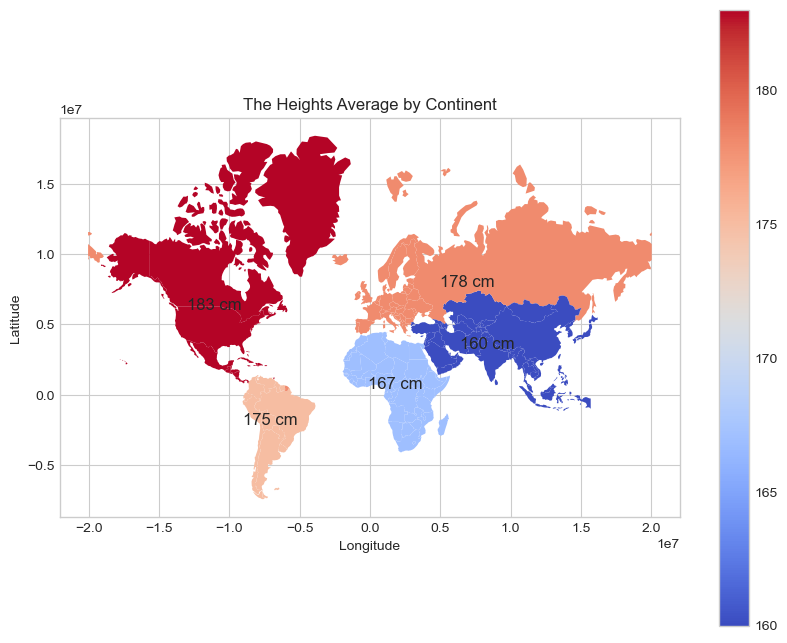

In [155]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# יצירת מילון של הגובהים הממוצעים לפי היבשות
heights = {'Africa': 167, 'North America': 183, 'Europe': 178, 'Australia': 190, 'South America': 175, 'Asia': 160}

# טעינת מפת העולם
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# המרת המערכת התייחסות למערכת מקורבנת (מקומית)
world = world.to_crs('EPSG:3395')

# הוספת עמודת הגובה הממוצע לפי היבשות
world['avg_height'] = world['continent'].map(heights)


# יצירת מפת חום לפי הגובה הממוצע
fig, ax = plt.subplots(1, 1, figsize=(10,8))
world.plot(column='avg_height', ax=ax, legend=True, cmap='coolwarm')

# הוספת כותרות
plt.title('The Heights Average by Continent')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


# הוספת הערכים למפה
for continent in heights:
    # חישוב הנקודה המייצגת של כל יבשת
    representative_point = world[world['continent'] == continent].geometry.representative_point()
    x = representative_point.x.mean()
    y = representative_point.y.mean()

    # התאמה ידנית של המיקום ליבשות מסוימות
    if continent == 'North America':
        y += 3e6  # Adjust the y-coordinate for North America
        x -= 2e6
    elif continent == 'Europe':
        x += 5e6  # Adjust the x-coordinate for Europe
        y += 1e6  # Adjust the y-coordinate for Europe

    # בדיקה אם הנקודה היא מספר ממשי
    if np.isfinite(x) and np.isfinite(y):
        # הוספת הערך לנקודה המייצגת של היבשת
        ax.text(x, y, str(heights[continent]) + ' cm', fontsize=12, ha='center')

# הצגת המפה
plt.show()


In [156]:
import pandas as pd

# Sample data
data = {'A': [1, 2, 3, 4, 5],
        'B': [5, 4, 3, 2, 1]}

df = pd.DataFrame(data)

# Correlation between series A and B
correlation = df['A'].corr(df['B'])
print(correlation)  # Output will be -1.0 as the data is perfectly negatively correlated


-0.9999999999999999
